# CS 124 Lecture: Skip Lists and Hash Table

__Boaz Barak__

April 1, 2019

# Skip lists

In [ ]:
import graphviz
from graphviz import Graph
from graphviz import Digraph
# Graph visualization library - requires graphviz on your system
# On Anaconda can install by
# conda install -c anaconda graphviz  (or download at https://www.graphviz.org/download/ )
# conda install -c conda-forge python-graphviz

In [ ]:
import random

In [ ]:
def method(cls,f):
    setattr(cls,f.__name__,f)

In [ ]:
INF = 100000000 # Our proxy for "infinity"

In [ ]:
PRINT_COIN = True

def coin():
    """Toss random coin"""
    c =  random.choice([0,1])
    if PRINT_COIN: print(["TAIL","HEAD"][c], end= " ")
    return c

In [ ]:
class Node:
    """A node in a skip list. 
    Contains the key and pointers to right and down neighbors."""
    def __init__(self,key,right=None,down=None): 
        self.key = key
        self.right = right
        self.down = down


In [ ]:
class SkipList:
    """A skip list contains the pointer to its top left node.
    It is initialized with top-left's key = -∞ and its right neighbor's key = +∞ """
    def __init__(self):
        topright = Node(+INF)
        self.topleft = Node(-INF,topright)

In [ ]:
counter = 0

def valstr(v):
    if v>=INF: return "+∞"
    if v<=-INF: return "-∞"
    return str(v)

def list2graph(G,n,x=0,y=0):
    if not n: return None
    global counter
    counter += 1
    vertex = str(id(n))
    G.node(vertex,valstr(n.key), pos = f"{x},{y}!")
    right = list2graph(G,n.right,x+1,y)
    down = list2graph(G,n.down,x,y-1)
    if right: G.edge(vertex,right)
    if down: G.edge(vertex,down)
    return vertex

def _repr_svg_(self):
    G =Digraph(engine="neato",graph_attr= {"concentrate":"true"} )
    list2graph(G,self.topleft)
    return G._repr_svg_()

method(SkipList,_repr_svg_)

In [ ]:
def pred_(n,val):
    """Predecessor query main function: 
    Given n, find the node to the right and down from n with key ≤ val"""
    if n.right.key<=val: return pred_(n.right,val) # move right
    if not n.down: return n # return n if at bottom level 
    return pred_(n.down,val) # move down

In [ ]:
def pred(self,val):
    """To compute predecessor on list, run pred_ on the topleft node."""
    return pred_(self.topleft,val).key

In [ ]:
method(SkipList,pred)

In [ ]:
def insert_(n,val):
    """Add a node with key val to the right and down of node n
    Return "STOP" if there is no promotion"""
    if not n: return None
    if n.right.key <= val: return insert_(n.right,val) # move right
    
    v = insert_(n.down,val)
    if v=="STOP": return v # no promotion - propagate this back
    
    # stick temp between n and n.right, temp points down to v:
    temp = Node(val,n.right,v) 
    n.right = temp
    if coin(): return temp # promote temp
    return "STOP" # no promotion

In [ ]:
def insert(self,val):
    """Add a value to the list"""
    insert_(self.topleft,val)
    if self.topleft.right.key < +INF: # make sure top level always -∞,+∞ 
        topright = Node(+INF)
        self.topleft = Node(-INF,topright,self.topleft)
    return self

In [ ]:
method(SkipList,insert)

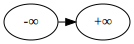

In [98]:
L = SkipList()
L

HEAD HEAD TAIL 

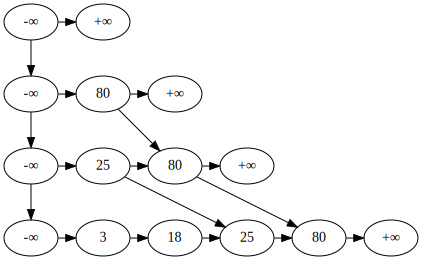

In [102]:
L.insert(80)

In [103]:
PRINT_COIN = False
for i in range(5):
    L.insert(random.randint(1,300))

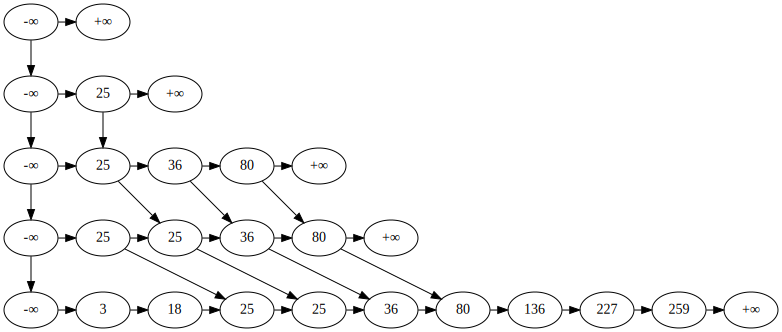

In [104]:
L

In [105]:
L.pred(20)

18

In [ ]:
PRINT_COIN = True

# Hash tables

In [ ]:
filename = 'cs124.csv'
# filename = 'CSV_Database_of_Last_Names.csv'

import csv
students = []
with open(filename,encoding='utf8') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    csvfile.seek(0)
    reader = csv.reader(csvfile,dialect)
    for row in reader:
        students += ["".join([s.strip() for s in row])]

In [ ]:
students = students[1:]

In [106]:
len(students)

283

In [ ]:
N = 300

In [ ]:
def letter2number(let): 
    # Given letter let, returns number from 1 to 26 based on alphabetical order
    return ord(let.lower())-ord('a')+1

def silly_hash(name):
    # Hash  name into a number from 0 to N-1
    # N is a global constant
    # Simply output first initial (as number from 1 to 26) times the length modulo N 
    return letter2number(name[0])*len(name) % N

In [107]:
silly_hash("Boaz Barak")

20

In [108]:
silly_hash("Jelani Nelson")

130

In [109]:
buckets =  [0]*N
for name in students:
    buckets[silly_hash(name)] += 1

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

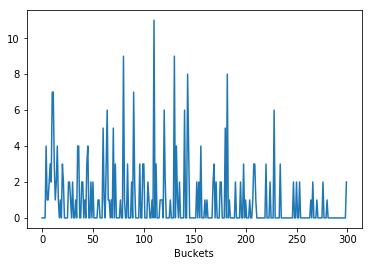

In [110]:
# Silly hash bucket distribution
plt.plot(buckets); plt.xlabel('Buckets'); plt.show()

In [128]:
NUMBERS = [random.randint(0,N-1) for i in range(30)]

In [129]:
print(NUMBERS)

[147, 175, 183, 119, 29, 34, 144, 242, 266, 137, 189, 169, 17, 285, 157, 135, 112, 74, 222, 34, 267, 222, 240, 264, 53, 240, 277, 259, 77, 77]


In [136]:
def better_hash(name):
    # DISCLAIMER: Despite name, DONT USE IT IN YOUR CODE - 
    # always use BUILT IN or CRYPTOGRAPHIC hash functions
    #
    # Hashes name into a number from 0 to N-1
    # N is a global constant
    # Treat name as a sequence (x0,x1,x2,...) of numbers from 1 to 26
    # Return sum of xi*NUMBERS[i] mod N
    # NUMBERS is a global constant array of numbers that we chose at random once
    # and then fixed once and for all
    name = name.replace(' ',"") # hack to ensure only letters
    return sum([letter2number(name[i])*NUMBERS[i] for i in range(len(name))]) % N
    

In [132]:
better_hash("Boaz Barak")

48

In [133]:
better_hash("Jelani Nelson")

94

In [134]:
better_hash("Jelani Nelson")

94

In [ ]:
sum([i*i for i in buckets])/sum(buckets)

In [135]:
buckets =  [0]*N
for name in students:
    buckets[better_hash(name) % N] += 1

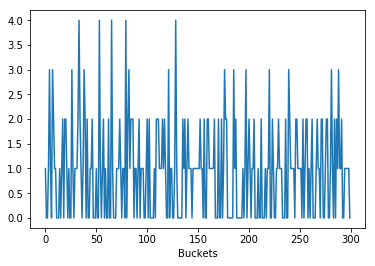

In [137]:
# Better hash bucket distribution
plt.plot(buckets); plt.xlabel('Buckets'); plt.show()

In [ ]:
sum([i*i for i in buckets])/sum(buckets)

# Some issues

## Semantically equal ≠ Hash equal

In [138]:
better_hash("Boaz Barak")

48

In [139]:
better_hash("Boaz M. Barak")

107

Need to ensure that $hash(x)=hash(x') \Leftrightarrow$ $x$ and $x'$ are semantically identical

## Adversarial data 

![](hashdos.png)

If $h:\{0,1\}^* \rightarrow [n]$ is chosen __independently__ of $x_1,\ldots,x_n$ then expected list size $=O(1)$:

$\Rightarrow$ _total running time_ $=O(n)$.

If  $x_1,\ldots,x_n$ chosen __based on__ $h$ then can ensure $h(x_1)=\ldots = h(x_n)$:

$\Rightarrow$ _total running time_ $=O(n^2)$.

Used in __denial of service attack__ against PHP, .net, Python, Java, Ruby, Apache,...

![](mspatch.png)